<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[Data Preprocessing](#dp)**
1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

**Import the required libraries**

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [2]:
# type your code here
# load the csv file
# store the data in 'df_cancer'
df = pd.read_csv('bank.csv')
x = df.drop('y',axis = 1)
y = df['y']

In [3]:
df.shape

(9640, 11)

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here

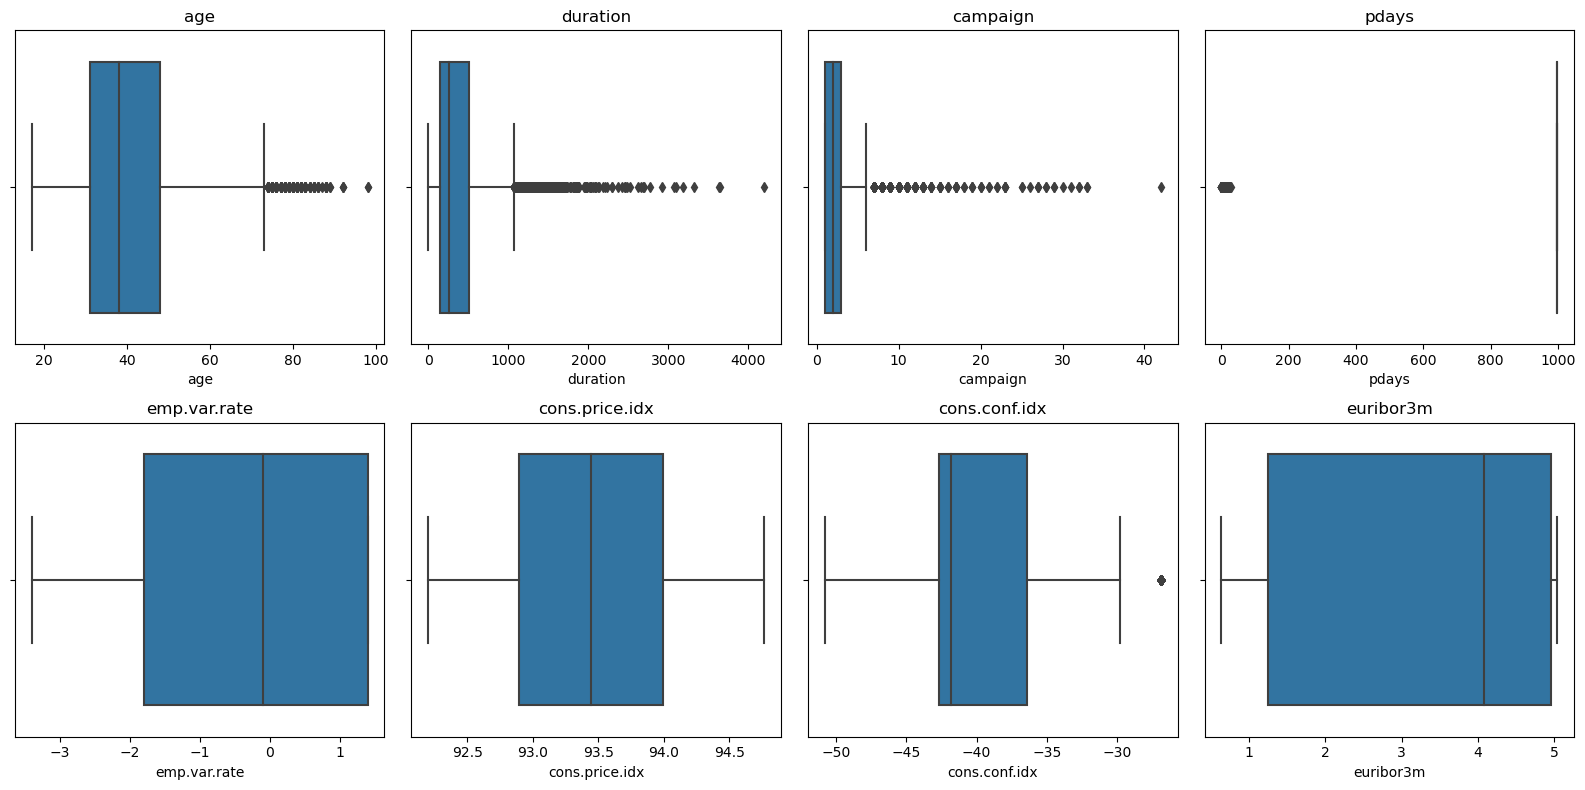

In [5]:
subset_df = df[['age','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through the columns and create boxplots
for i, col in enumerate(subset_df.columns):
    sns.boxplot(x=subset_df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

In [6]:
# Assuming you have a DataFrame 'df' containing your data

# Define a function to apply capping to a column
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound
    return column

# Select only numerical columns for outlier treatment
numerical_columns = df.select_dtypes(include=[np.number])

# Apply the cap_outliers function to each numerical column
df[numerical_columns.columns] = numerical_columns.apply(cap_outliers)

# Now, 'df' contains your data with outliers capped for all numerical columns


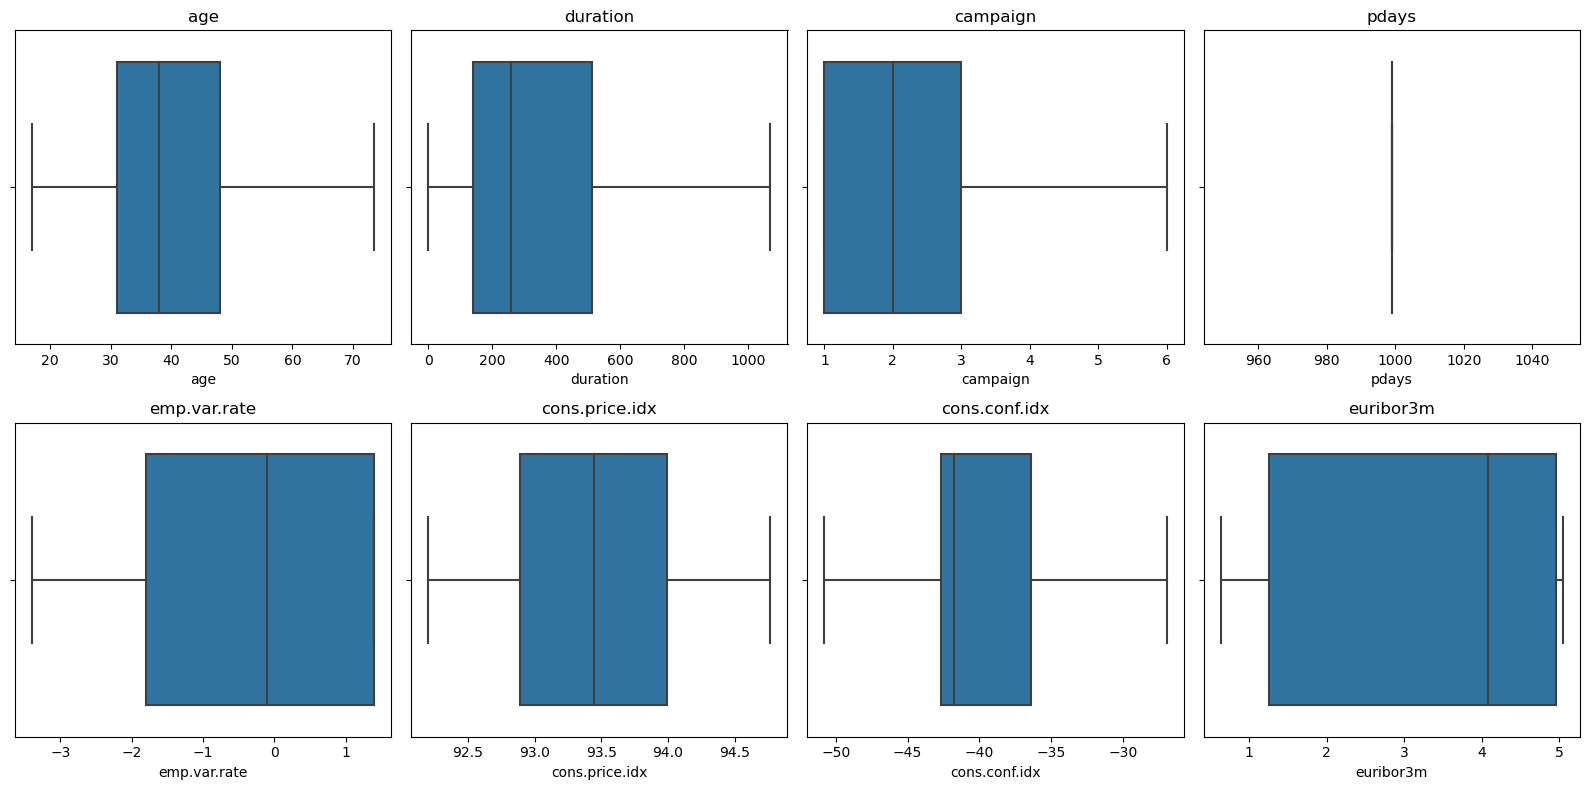

In [7]:
subset_df = df[['age','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through the columns and create boxplots
for i, col in enumerate(subset_df.columns):
    sns.boxplot(x=subset_df[col], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

In [8]:
df.shape

(9640, 11)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace no with 0 and yes with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here

In [10]:
x = df.drop('y', axis = 1)
y = df['y']

In [11]:
y = y.apply(lambda x : 1 if x == 'yes' else 0 )

In [12]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here

In [34]:
df.isnull().sum().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here

In [39]:
for i in x.columns:
    print(x[i].nunique)

<bound method IndexOpsMixin.nunique of 0      32.000000
1      32.000000
2      45.000000
3      33.000000
4      47.000000
5      25.000000
6      36.000000
7      43.000000
8      52.000000
9      34.000000
10     48.000000
11     45.000000
12     32.000000
13     40.000000
14     51.000000
15     43.000000
16     38.000000
17     53.000000
18     23.000000
19     57.000000
20     46.000000
21     73.500000
22     32.000000
23     39.000000
24     35.000000
25     43.000000
26     23.000000
27     33.000000
28     48.000000
29     56.000000
30     56.000000
31     40.000000
32     31.000000
33     31.000000
34     26.000000
35     27.000000
36     29.000000
37     37.000000
38     31.000000
39     37.000000
40     38.000000
41     28.000000
42     26.000000
43     49.000000
44     29.000000
45     36.000000
46     34.000000
47     62.000000
48     73.500000
49     39.000000
50     24.000000
51     60.000000
52     34.000000
53     25.000000
54     41.000000
55     41.000000
56     62

<bound method IndexOpsMixin.nunique of 0       999
1       999
2       999
3       999
4       999
5       999
6       999
7       999
8       999
9       999
10      999
11      999
12      999
13      999
14      999
15      999
16      999
17      999
18      999
19      999
20      999
21      999
22      999
23      999
24      999
25      999
26      999
27      999
28      999
29      999
30      999
31      999
32      999
33      999
34      999
35      999
36      999
37      999
38      999
39      999
40      999
41      999
42      999
43      999
44      999
45      999
46      999
47      999
48      999
49      999
50      999
51      999
52      999
53      999
54      999
55      999
56      999
57      999
58      999
59      999
60      999
61      999
62      999
63      999
64      999
65      999
66      999
67      999
68      999
69      999
70      999
71      999
72      999
73      999
74      999
75      999
76      999
77      999
78      999
79      999
8

<bound method IndexOpsMixin.nunique of 0      -36.400000
1      -42.700000
2      -36.100000
3      -49.500000
4      -47.100000
5      -50.000000
6      -42.000000
7      -36.400000
8      -36.400000
9      -40.800000
10     -42.000000
11     -36.100000
12     -47.100000
13     -36.400000
14     -36.100000
15     -42.000000
16     -36.400000
17     -41.800000
18     -46.200000
19     -47.100000
20     -33.000000
21     -30.100000
22     -42.700000
23     -26.950000
24     -41.800000
25     -42.700000
26     -37.500000
27     -47.100000
28     -45.900000
29     -36.400000
30     -29.800000
31     -36.400000
32     -46.200000
33     -38.300000
34     -37.500000
35     -49.500000
36     -40.800000
37     -42.700000
38     -46.200000
39     -46.200000
40     -41.800000
41     -36.400000
42     -31.400000
43     -36.400000
44     -33.600000
45     -46.200000
46     -34.800000
47     -33.000000
48     -26.950000
49     -34.800000
50     -46.200000
51     -42.700000
52     -42.700000
53     

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here

<a id="knn"> </a>
## 2. K Nearest Neighbors (KNN)

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [18]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Define a function to plot the confusion matrix.

In [19]:
# type your code here

#### Define a function to plot the ROC curve.

In [20]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a confusion matrix using the function created above and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [23]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 13.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

In [28]:
# type your code here

<a id="nb"> </a>
## 3. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 18.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here